# 1. Quick Preview of the Data Set

In [1]:
import pandas as pd

dataframe = pd.read_csv("aps_failure_set.csv")

In [2]:
dataframe.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [3]:
dataframe.tail()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0
59999,neg,40222,na,698,628,0,0,0,0,0,...,440066,183200,344546,254068,225148,158304,170384,158,0,0


# 2. Characterisation of the Data Set

In [4]:
#import warnings
#warnings.filterwarnings("ignore")

In [5]:
import pandas as pd

dataframe = pd.read_csv("aps_failure_set.csv", na_values="na")

## 2.1 Size, number of attributes, number of observations

In [6]:
num_rows, num_cols = dataframe.shape

print("Number of Rows:", num_rows)
print("Number of Columns (Attributes):", num_cols)

Number of Rows: 60000
Number of Columns (Attributes): 171


- Dataset is defined by means of a number of rows representing observations that determine the size of the dataset being analyzed. It gives us an idea of the number of instances that describe each variable in our data set.

- By knowing how many columns a data set has, one easily understands its dimensionality. Every column refers to a variable, attribute or a feature. Therefore, the number of attributes tells us the amount of details available in the data.

## 2.2 Check for missing values

In [7]:
missing_values = dataframe.isna().sum()
attributes_with_missing_values = missing_values[missing_values > 0]

print("Number of Attributes with Missing Values:", attributes_with_missing_values.count())

Number of Attributes with Missing Values: 169


## 2.3 Percentage of Missing Values for Each Attribute

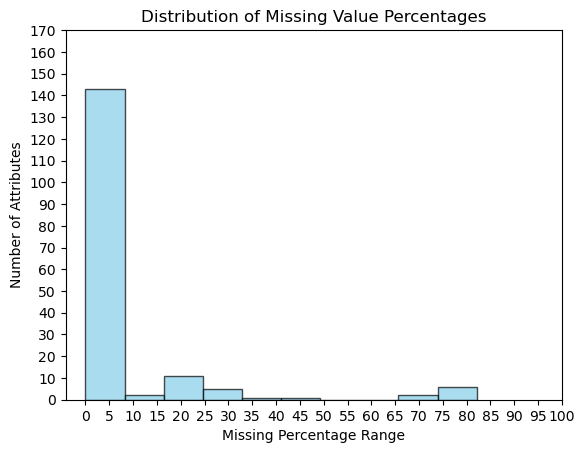

In [8]:
import matplotlib.pyplot as plt

missing_percentage = dataframe.isna().mean() * 100

x_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
y_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170]

plt.hist(missing_percentage, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Missing Value Percentages")
plt.xlabel("Missing Percentage Range")
plt.ylabel("Number of Attributes")
plt.xticks(x_bins)
plt.yticks(y_bins)
plt.show()

- Missing values in data can be easily identified if the attributes are listed. Analysis and modeling may be compromised by missing data, and therefore it affects the validity.

- We determine the degree of missing data by considering the number of attributes that lack values as well as the missing frequency for each attribute. Missing data in attributes that involve many missing values is handled via filling them using some sort of imputation or removal technique.

- It is important to tackle the issue of missing values as it directly affects decision-making concerning optimal data pretreatment.